## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from dateutil import parser

## 1. Carga datos y representa la serie

In [21]:
df = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\3-Time_Series\ejercicios\data\AirPassengers.csv', parse_dates=['date'])

In [22]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


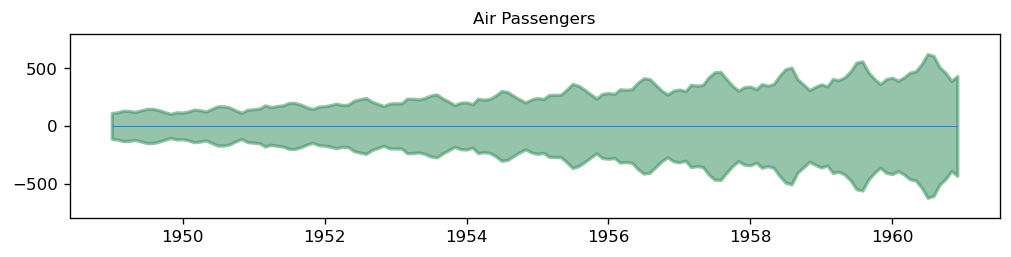

In [27]:
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,2), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers', fontsize=10)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

Cada 12 meses 

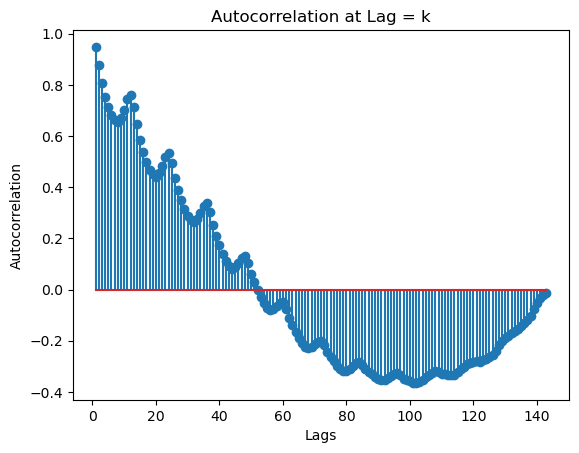

In [32]:
from statsmodels.graphics.tsaplots import acf
import matplotlib.pyplot as plt

# Calcular la autocorrelación en lags estacionales
lag_acf = acf(df['value'], nlags=143)

# Graficar la autocorrelación
plt.stem(range(1, 144), lag_acf[1:])
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation at Lag = k')
plt.show()

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

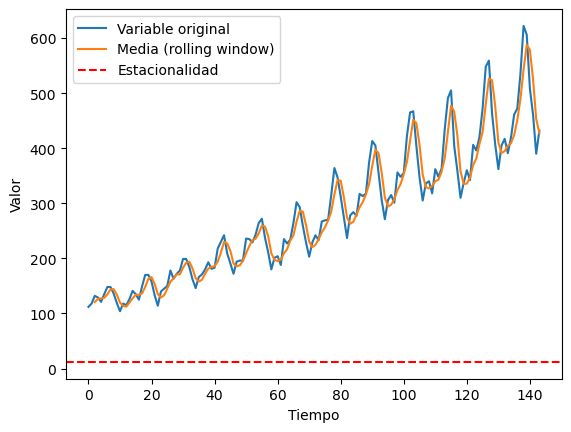

In [39]:
# Media obtenida mediante rolling window
ventana = 3  # Tamaño de la ventana deslizante
media_rolling = df['value'].rolling(window=ventana).mean()

# Valor de la estacionalidad obtenido anteriormente
estacionalidad = 12

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar datos originales
ax.plot(df['value'], label='Variable original')

# Graficar media mediante rolling window
ax.plot(media_rolling, label='Media (rolling window)')

# Graficar valor de estacionalidad
ax.axhline(estacionalidad, color='red', linestyle='--', label='Estacionalidad')

# Configurar leyenda y etiquetas de ejes
ax.legend()
ax.set_xlabel('Tiempo')
ax.set_ylabel('Valor')

# Mostrar la gráfica
plt.show()

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [40]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller Aumentada
result = adfuller(df['value'])

# Extraer el valor p y compararlo con un umbral para determinar la estacionaridad
p_value = result[1]
alpha = 0.05  

if p_value <= alpha:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

La serie no es estacionaria.


## 4. Aplica una transformación logarítmica

In [45]:

# Desplazar la serie sumando 1
df_shifted = df['value'] + 1

df_log = np.log(df_shifted)
df_log.head()


0    4.727388
1    4.779123
2    4.890349
3    4.867534
4    4.804021
Name: value, dtype: float64

## 5. Divide en train y test. Guarda 20 muestras para test.

## 6. Crea tu primer modelo ARIMA

## 7. Representa en una gráfica los datos de test y tus predicciones.

## 8. Prueba otros modelos, a ver qué performance presentan.